#               <h1>Titanic⛵ Disaster Dataset<h1>

<centre>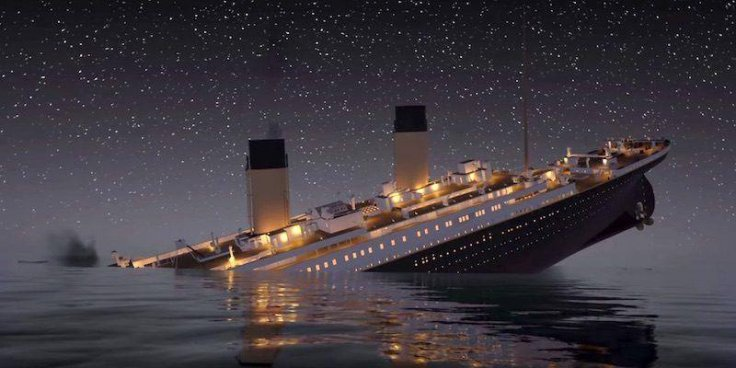<centre>

## **DESCRIPTION:**

Classic dataset on Titanic disaster used often for data mining tutorials and demonstrations.

## **SUMMARY:**

This is a classic dataset used in many data mining tutorials and demos -- perfect for getting started with exploratory analysis and building binary classification models to predict survival.

Data covers passengers only, not crew.

## **FEATURES:**

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)**

## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import pandas_profiling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

## Reading and Understanding the Data

In [ ]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [ ]:
train.head()

* **Numerical Features**   : PassengerId,Age,Fare,SibSp,Parch
* **Categorical Features** : Survived,Pclass,Name,Sex,Embarked

In [ ]:
test.head()

* **Numerical Features**   : PassengerId,Age,Fare,SibSp,Parch
* **Categorical Features** : Pclass,Name,Sex,Embarked

In [ ]:
print("train:",train.shape)
print("test:",test.shape)

In [ ]:
train.info()
print('_'*50)
test.info()

In [ ]:
train.describe()

In [ ]:
test.describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), cbar=False)

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(), cbar=False)

### We have high number of missing values in Age and Cabin columns of both Train and Test dataset.

In [ ]:
train.isnull().sum()

## Missing Values:
*   Cabin       :   687
*   Age         :   177 
*   Embarked    :   2

In [ ]:
test.isnull().sum()

## **Missing Values**:

* Cabin : 327
* Age : 86
* Fare :1 


## Handling Missing Values

## 1) Age

### Imputing the missing values of Age with median as the column has no outliers.

In [ ]:
train['Age']= train['Age'].fillna(train['Age'].median())
test['Age']= test['Age'].fillna(test['Age'].median())

In [ ]:
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

## 2) Cabin

In [ ]:
train["Cabin"].describe()

In [ ]:
test["Cabin"].describe()

In [ ]:
train['Cabin'][train['Cabin'].notnull()].head()

In [ ]:
test['Cabin'][test['Cabin'].notnull()].head()

### Observing the values above the first letter is for "Deck".However the missing values for cabin might be because not everyone was allocated a Cabin and we could just make use of Deck and fill the missing.

In [ ]:
train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'M' for i in train['Cabin']])
test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'M' for i in test['Cabin']])

In [ ]:
print(train["Cabin"].isnull().sum())
print(test["Cabin"].isnull().sum())

In [ ]:
test['Cabin'].value_counts()

## 3) Embarked

In [ ]:
train['Embarked'].value_counts()

### Imputing the missing values with mode.

In [ ]:
train['Embarked']= train['Embarked'].fillna(train['Embarked'].mode()[0])

In [ ]:
train['Embarked'].isnull().sum()

## 4) Fare

In [ ]:
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [ ]:
test.isnull().sum()

In [ ]:
train.isnull().sum()

## Visualisations

In [ ]:
sns.pairplot(train)

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True,cmap='Purples')

**Observations**:

* Survived is highly correlated with Fare which can be assumed that higher the fare is higher the priority given to such passengers.
* Survived is also strongly related to Passenger Class which also says higher Pclass i.e., 2 or 3 is likely to survive less as the classes were at bottom, which says they were likely to hit the water first.

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(test.corr(),annot=True,cmap='summer')

## 1) Passenger Class

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Survived',hue='Pclass',data=train,palette='twilight')

**Observations**:
    
* Survived passengers are higher in number from Pclass-1, they were evacuated first.
* Passengers from Pclass-3 are higher in count who couldn't survive as they were the first to hit the water flow.

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Sex',hue='Pclass',data=train,palette='mako')

**Observations**:

* We can see more of the passengers were in Pclass-3 
* Passengers had high ratio of males when compared to females.

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Embarked',hue='Pclass',data=train,palette='gist_heat')

Observations:

* Most of the were passengers coming from Southampton in Pclass-3.

In [ ]:
train['Family_size']= train['SibSp']+train['Parch']+1

In [ ]:
test['Family_size']= test['SibSp']+test['Parch']+1

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Family_size',hue='Pclass',data=train,palette='tab20')

Observations:

* Most of the passengers in Pclass-3 were Single.
* The families also were maximum in number were in Pclass-3.

In [ ]:
plt.figure(figsize=(8,5))
train.groupby('Pclass')['Fare'].sum().plot(kind='bar')

Observations:
    
* The fare of Pclass-1 being the expensive and Pclass-3 cheapest one.

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Cabin','Pclass',hue='Pclass',data=train,palette='Set1')

Observations:

* P-3 passengers were in Deck M,G,E and F.
* P-2 passengers were in Deck M,E,D,and F.
* P-1 passengers were in Deck M,C,D,A,B and T

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Sex",hue="Pclass", data=train,palette='gray')

**Observations**:
    
* The passengers in Pclass-1 were elder than the passengers in other Pclass.
* Age distribution seems to be the same in Male and Female subpopulations.

## 2) Sex

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Survived',hue='Sex',data=train,palette='summer')

Observations:

* This clearly reminds me of the line "Female and Children only!" and it is evident that females were evacuated first.
* There were only few men who were rescued when most of the female and children were evacuated.

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y="Survived", x="Sex", hue="Pclass", data=train, palette="ocean")

Observations:

* This clearly shows first females were rescued from all the Pclass.

## 3) Age

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Survived", y = "Age",data = train,palette='plasma',size=6)

**Observations**:
    
* The violin plot of survived passengers, we can notice that very young passengers have higher survival rate.

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Sex",hue="Pclass",data=train,palette='Purples')

Observations:
    
* The aged passengers are in Pclass 1 and younger in the other two Pclass.So the older passengers were rescued first and later the younger ones.

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Family_size",hue="Survived", data=train,palette='rainbow')

Observations:

* Passengers with small families could survive when compared to families with more than 5 members.

## 4) Family Size

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(y="Family_size",x='Survived',data = train,palette='hsv')

Observations:

* Family Size of 6-8 were able to survive.    

## 5) Embarked

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Embarked','Survived',data=train,palette='muted')

Observations:

* It seems that passenger coming from Cherbourg (C) are likely to have higher survival rate.

In [ ]:
plt.figure(figsize=(8,5))
sns.catplot("Pclass", col="Embarked",hue='Survived',data=train,kind='count',palette="inferno")

**Observations**:

* Survival rate of passengers coming from Southampton(S) seated in Pclass-1 is higher.

In [ ]:
plt.figure(figsize=(8,5))
sns.catplot("Family_size", col="Embarked",hue='Survived',data=train,kind='count',palette="terrain")

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Embarked",hue='Survived',data=train, palette="cividis")

**Observations**:

* Passengers of age 30 have high chances of surviving if they come from Cherbourg (C).

## 6) Fare

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(train['Fare'],bins=30,color='m')

### Fare values are highly skewed and hence need to be treated with log transformation.

In [ ]:
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(train['Fare'],bins=30,color='m')

Skewness is clearly reduced after the log transformation

## Dealing with Categorical Variables

In [ ]:
train.columns

## 1) Sex

In [ ]:
codes = {"male": 0, "female": 1}
train['Sex']= train['Sex'].map(codes)
test['Sex']= test['Sex'].map(codes)

## 2) Embarked

In [ ]:
codes = {"S": 1, "C": 2, "Q": 3}
train['Embarked']= train['Embarked'].map(codes)
test['Embarked']= test['Embarked'].map(codes)

## 3) Cabin

In [ ]:
codes= {'M':1,'C':2,'B':3,'D':4,'E':5,'F':6,'A':7,'G':8,'T':9}
train['Cabin']= train['Cabin'].map(codes)

In [ ]:
codes= {'M':1,'C':2,'B':3,'D':4,'E':5,'F':6,'A':7,'G':8}
test['Cabin']= test['Cabin'].map(codes)

In [ ]:
train.head()

In [ ]:
test.head()

### We can also drop the columns SibSp and Parch as we have derived a column Family_size out of them.

In [ ]:
train.drop(['SibSp','Parch','Ticket'],axis=1,inplace=True)
test.drop(['SibSp','Parch','Ticket'],axis=1,inplace=True)

### Dropping the Name column which doesn't add up to our predictions.

In [ ]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
test.head()

## Model Building

In [ ]:
X_train = train.drop(['Survived','PassengerId'], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

## 1) Logistic Regression :

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
# Fitting the model on our trained dataset.
LR.fit(X_train,Y_train)

In [ ]:
# Making Predictions
y_pred = LR.predict(X_test)

In [ ]:
# Calculating the Accuracy of the model.

print("Accuracy:",round(LR.score(X_train, Y_train)*100,2))

In [ ]:
LR.coef_

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family_size']

## Feature Importance

In [ ]:
coeff = pd.DataFrame(X_train.columns)
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(LR.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Correlation','Feature',data=coeff,palette='magma')

## 2) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=100,random_state=22)

In [ ]:
# Fitting the model on our trained dataset.
RF.fit(X_train,Y_train)

In [ ]:
# Making Predictions
y_pred = RF.predict(X_test)

In [ ]:
# Calculating the accuracy
print("Accuracy:",round(RF.score(X_train, Y_train)*100,2))

In [ ]:
feature_imp = pd.Series(RF.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

In [ ]:
sns.barplot(feature_imp.values,feature_imp.index,palette='bone')

## **Summary:**
    
**Logistic Regression:**

   * **Accuracy** : 81.14
   * **Feature Importance** : Sex,Fare,Cabin

**Random Forest Classifier:**
    
   * **Accuracy**: 98.32
   * **Feature Importance**: Sex,Fare,Age

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('titanic_2218.csv', index=False)

## If you have reached the end, I would Thank you for investing your precious time here! I would like to hear from you in comments section 😊


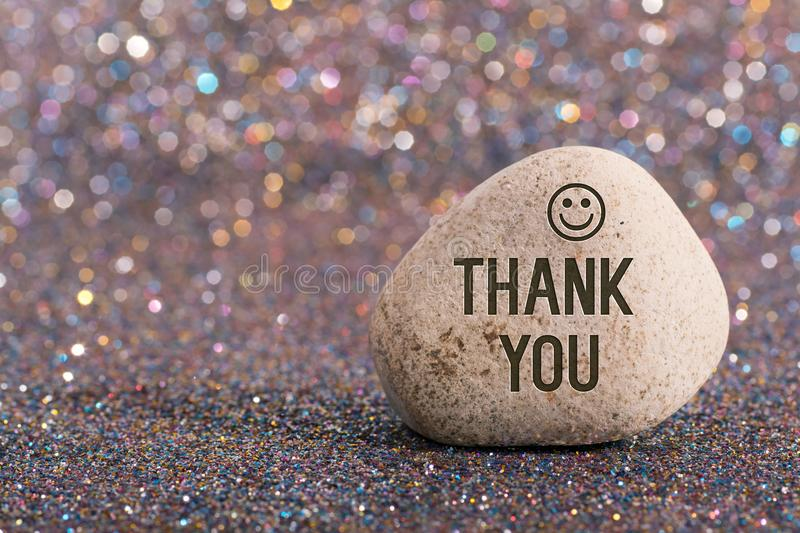